In [1]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
import sys,os
sys.path.insert(0, os.path.abspath('..'))

import numpy as np
import pandas as pd
import torch
import matplotlib.pyplot as plt
import seaborn as sns

import fobm.stats as stats
import fobm.utils as utils

basename = 'LA_ID_12M_cont_0pad_PlusBasic'

df, labels = utils.load_dataset(basename)
df = utils.remove_features_zero_std(df, df)
df = utils.remove_features_zero_std(df, df.loc[labels[basename]==1])
df = utils.remove_features_zero_std(df, df.loc[labels[basename]==0])

sns.set_style("ticks")

/tmp/ipykernel_459386/2508721540.py:35: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(format_labels(current_values))


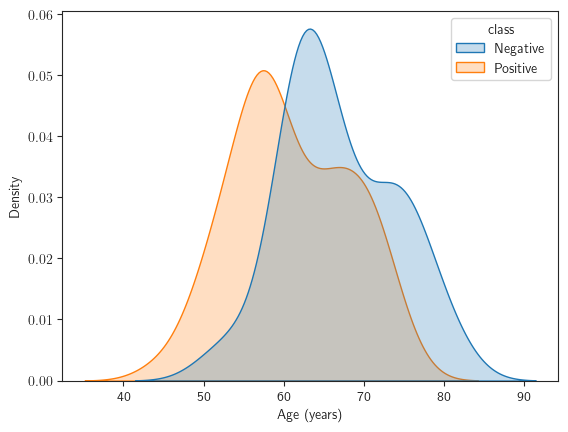

/tmp/ipykernel_459386/2508721540.py:46: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(format_labels(current_values))


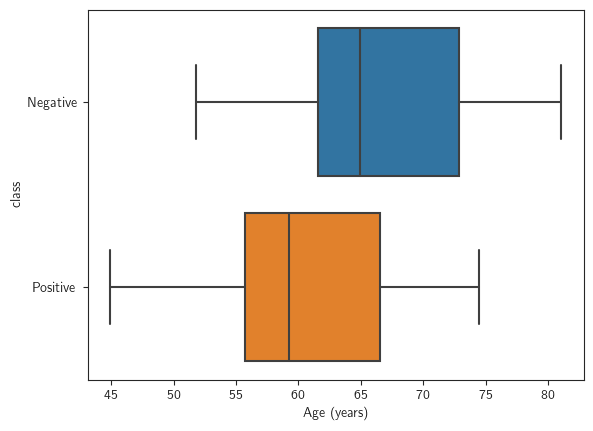

In [47]:
feature = "ant_fat_MinimumIntensity_T12__a45_d1_b5_w2_f3"
feature = "ant_fat_ModeIntensity_T12__a90_d3_b20_w2_f3"
feature = "ant_fat-PeakH intensity-T12--a360-d3-b10-w3-f5"

feature = "ant_fat_ModeIntensity_T12__a45_d3_b10_w3_f5"

feature = feature.replace("_", "-")
feature = feature.replace("ant-fat", "ant_fat")
feature = feature.replace("Intensity", " intensity")

df = df.rename(columns={'ant_fat-Mode intensity-T12--a45-d3-b10-w3-f5': 'GLCM mode a45 d3 b10 w3'})

df = df.rename(columns={'Age_years': 'Age (years)'})
feature = "Age (years)"

# feature = 'GLCM mode a45 d3 b10 w3'

df['class'] = labels[basename]
df["class"] = df["class"].replace({0: "Negative", 1: "Positive"})
df.head()

sns.kdeplot(data=df, x=feature, hue="class", fill=True, common_norm=False);

def format_labels(current_values):
    newlabels = []
    for value in current_values:
        if abs(value) >= 10000:
            newlabels.append(f"{value:,.0f}")
        else:
            newlabels.append(f"{value:.0f}")
    return newlabels


current_values = plt.gca().get_xticks()
plt.gca().set_xticklabels(format_labels(current_values))
# plt.gca().set_xticklabels(['{:,.0f}'.format(x) for x in current_values])

filename = feature
for char in ['(', ')', ' ']:
    filename = filename.replace(char, '_')
plt.savefig(filename + "_kde.png", dpi=600)
plt.show()

sns.boxplot(data=df, x=feature, y="class")
current_values = plt.gca().get_xticks()
plt.gca().set_xticklabels(format_labels(current_values))

plt.savefig(filename + "_boxplot.png", dpi=600)
plt.show()

<AxesSubplot: xlabel='GLCM mode a45 d3 b10 w3', ylabel='Probability'>

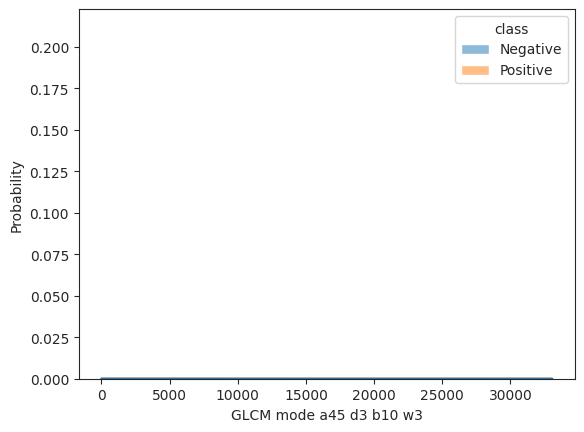

In [4]:
sns.histplot(data=df, x=feature, hue="class", fill=True, stat="probability", common_norm=False, kde=True, binwidth=1)

ValueError: Could not interpret value `Age (years)` for parameter `x`

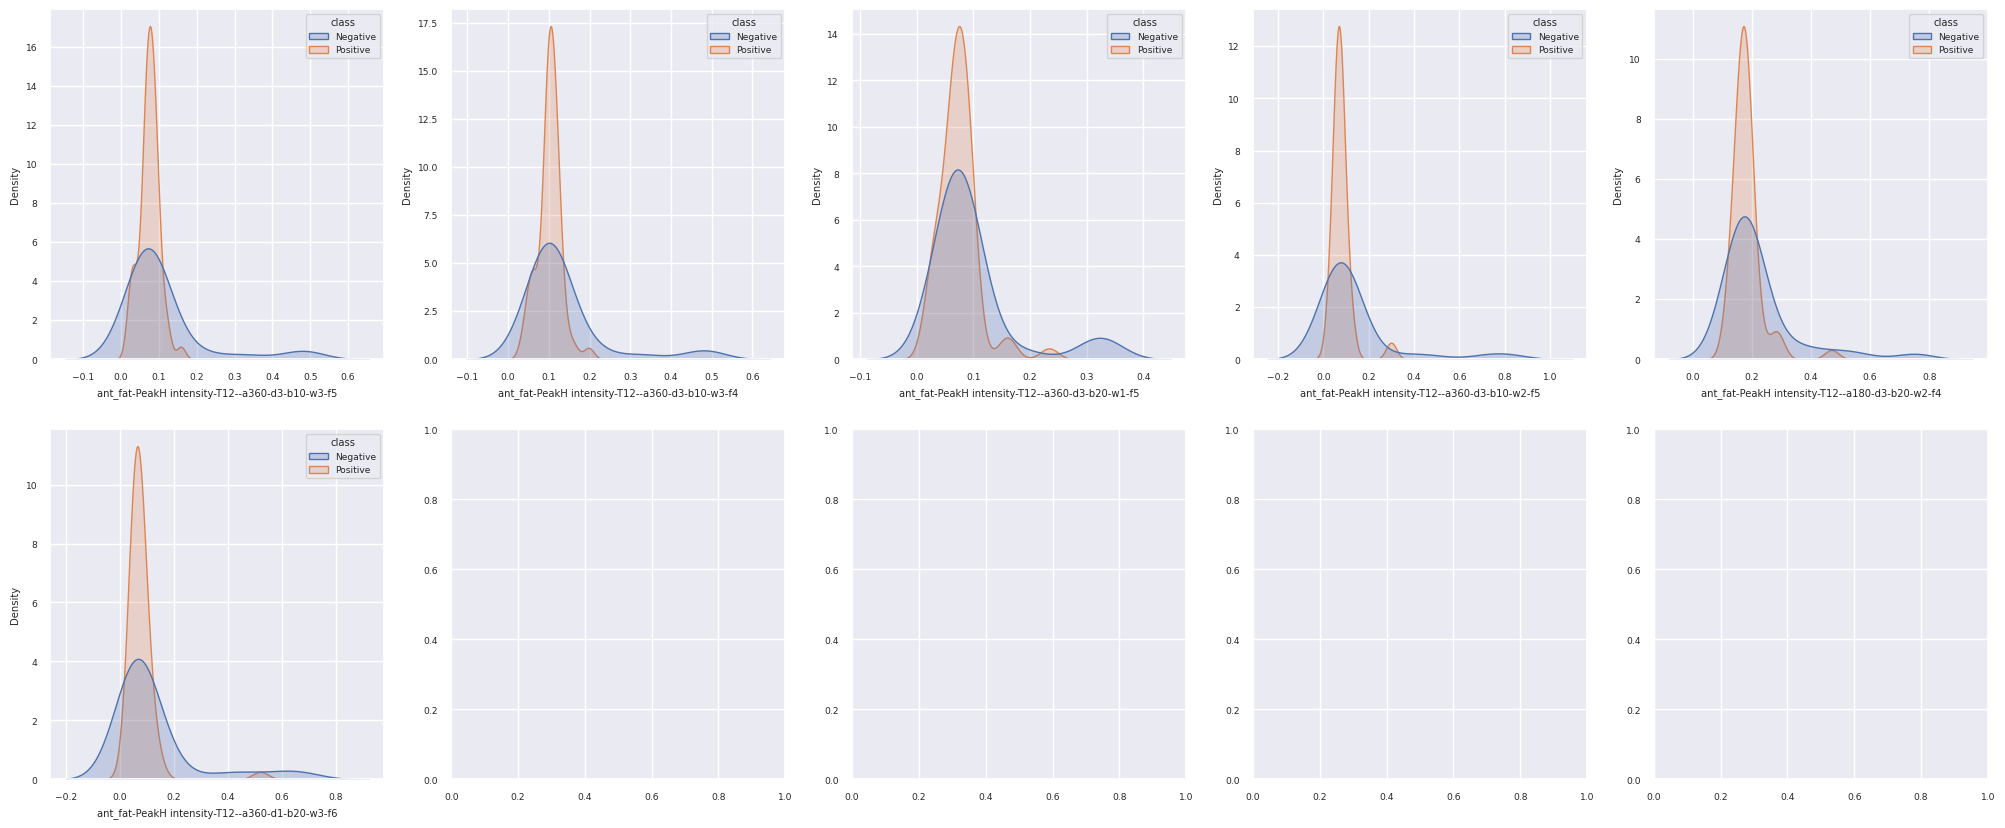

In [5]:
selected_features = ['ant_fat-PeakH intensity-T12--a360-d3-b10-w3-f5',
       'ant_fat-PeakH intensity-T12--a360-d3-b10-w3-f4', 'ant_fat-PeakH intensity-T12--a360-d3-b20-w1-f5',
       'ant_fat-PeakH intensity-T12--a360-d3-b10-w2-f5', 'ant_fat-PeakH intensity-T12--a180-d3-b20-w2-f4',
       'ant_fat-PeakH intensity-T12--a360-d1-b20-w3-f6', 'Age (years)',
       'ant_fat-Maximum intensity-T12--a360-d3-b20-w1-f2','ant_fat-3RDMoment intensity-T12--a90-d1-b20-w3-f4',
       'ant_fat-3RDMoment intensity-T12--a90-d1-b10-w3-f4']

# selected_features = ['ratio_surface_area_left_right', 
#        'ratio_evalue1_slambda_right','Age_years','evalue1_right',
#        'ant_fat-Minimum intensity-T12--a180-d1-b10-w3-f6']

# Best p-value
# selected_features = ['ant_fat_ModeIntensity_T12__a45_d3_b10_w3_f5','ant_fat_ModeIntensity_T12__a45_d3_b10_w3_f5','ant_fat_ModeIntensity_T12__a45_d3_b10_w3_f5','ant_fat_ModeIntensity_T12__a45_d3_b10_w3_f5','ant_fat_ModeIntensity_T12__a45_d3_b10_w3_f5','ant_fat_ModeIntensity_T12__a45_d3_b10_w3_f5']


num_features = len(selected_features)
nrows = num_features//5
sns.set(font_scale=.6)
f, axs = plt.subplots(nrows, num_features//nrows, figsize=(25, nrows*5))
axs = axs.flatten()
for i in range(num_features):
    sns.kdeplot(data=df, x=selected_features[i], hue="class", fill=True, ax=axs[i], common_norm=False)

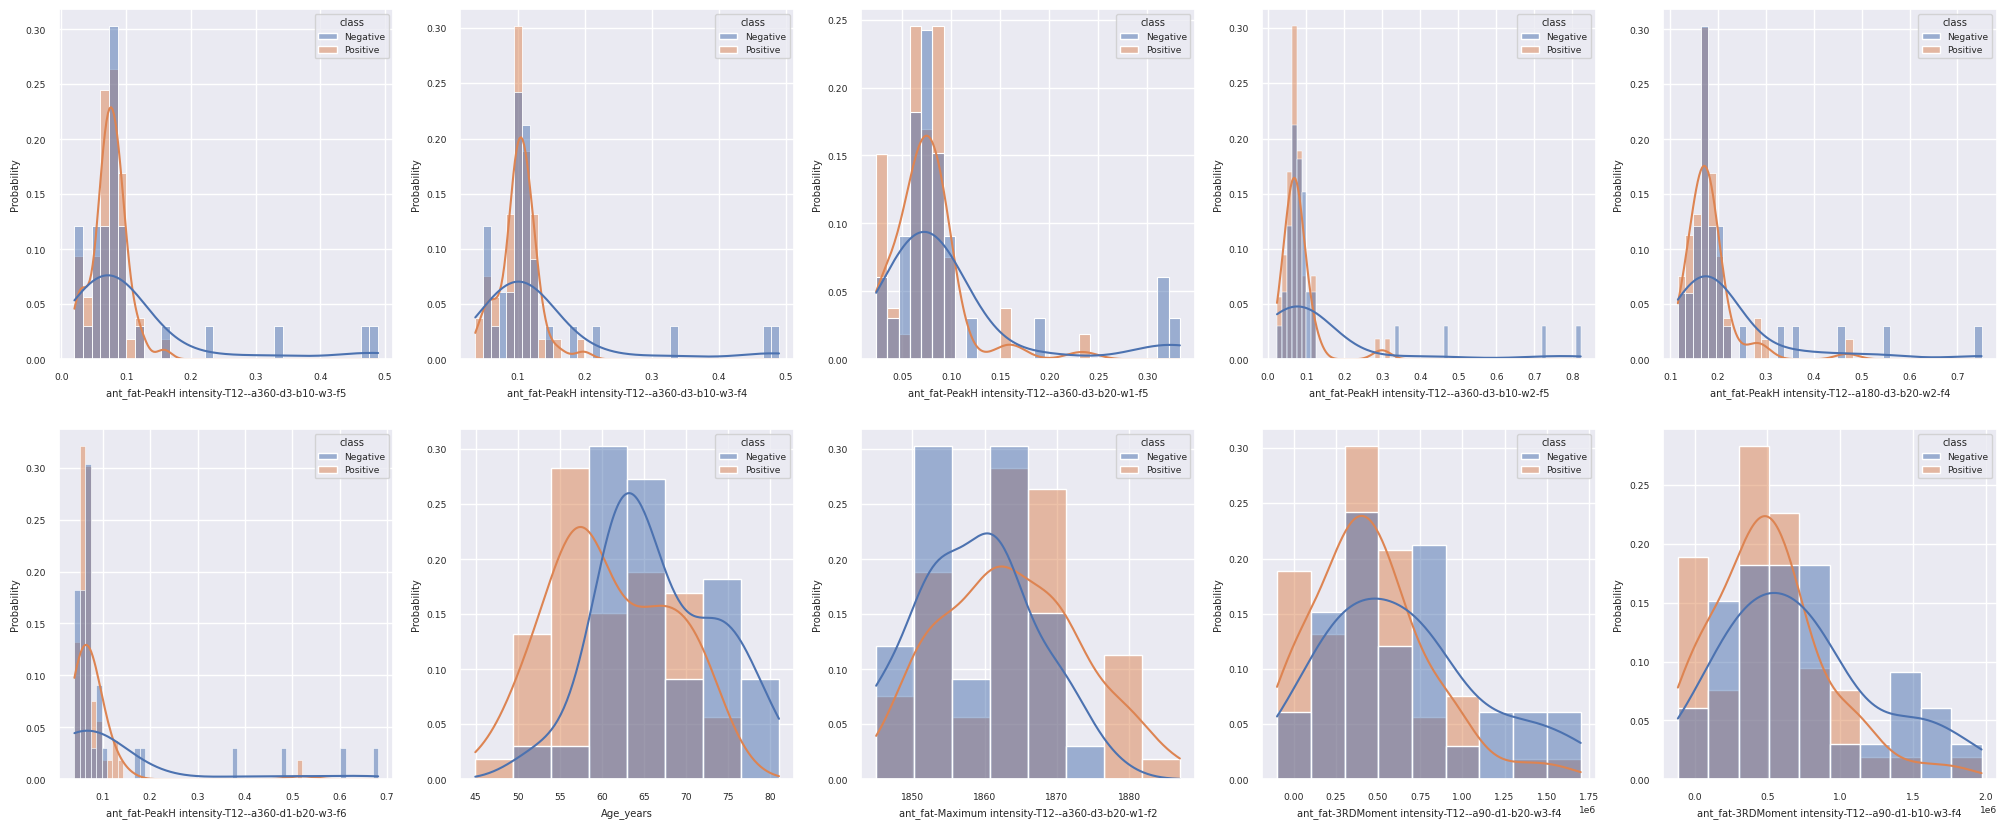

In [ ]:
f, axs = plt.subplots(nrows, num_features//nrows, figsize=(25, 10))
axs = axs.flatten()
for i in range(num_features):
    sns.histplot(data=df, x=selected_features[i], hue="class", fill=True, stat="probability", ax=axs[i], common_norm=False, kde=True)

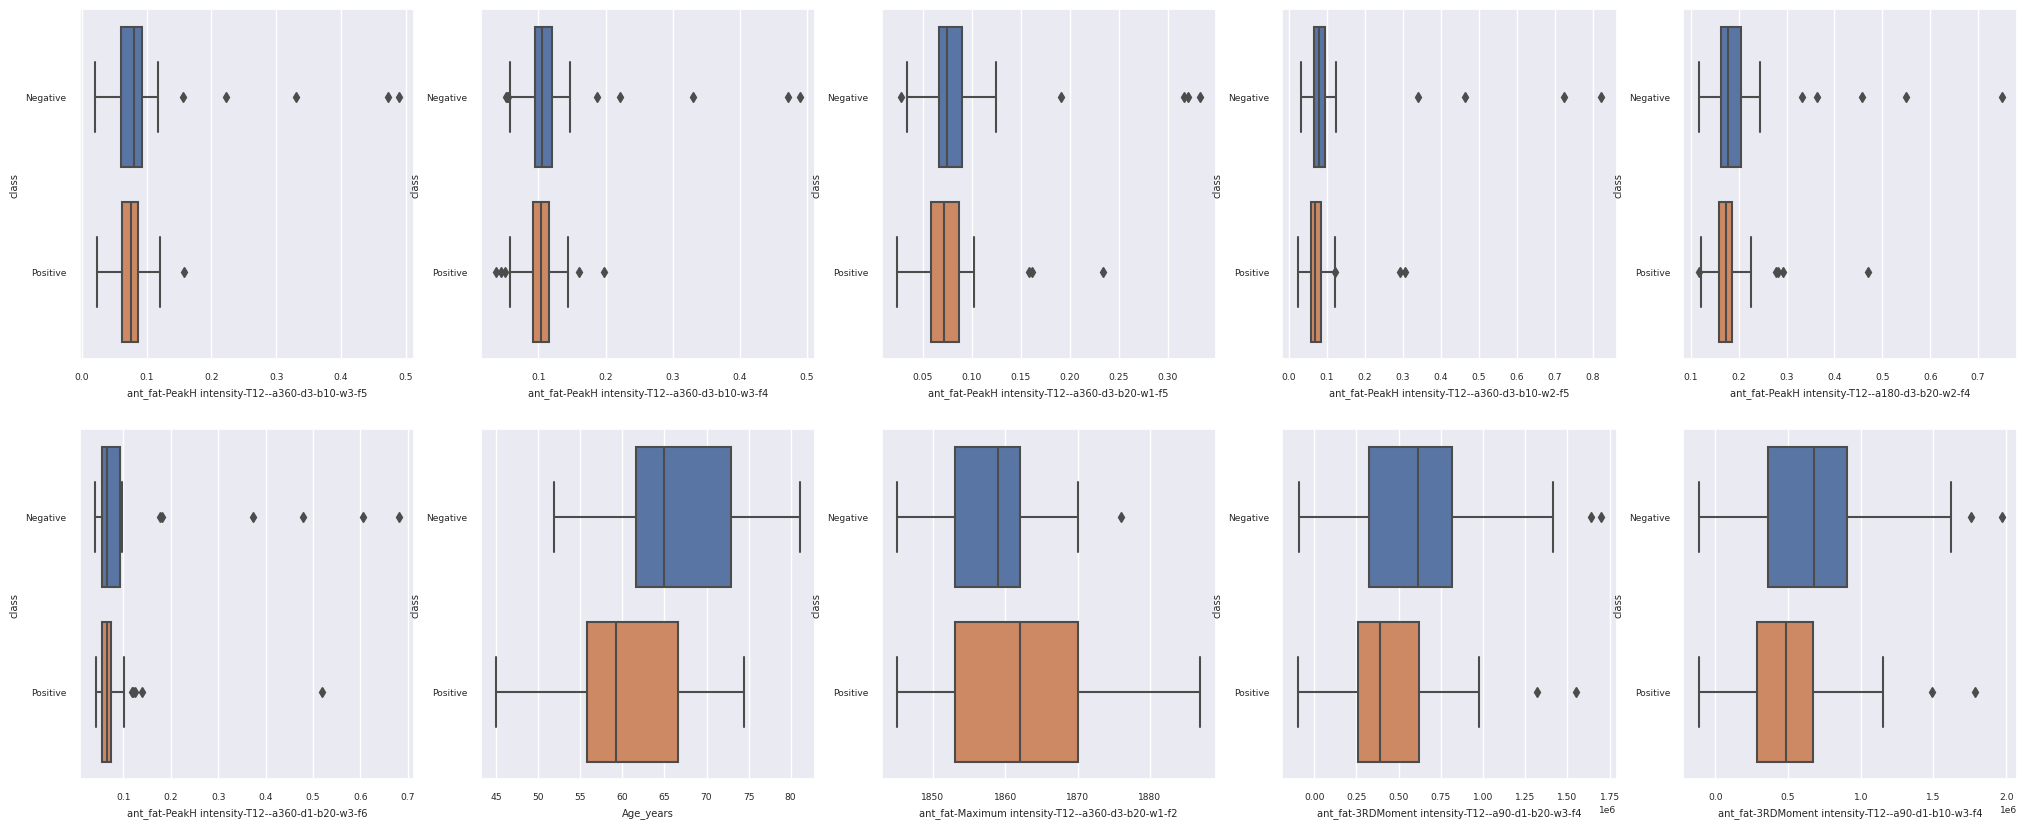

In [ ]:
f, axs = plt.subplots(nrows, num_features//nrows, figsize=(25, 10))
axs = axs.flatten()
for i in range(num_features):
    sns.boxplot(data=df, x=selected_features[i], y="class", ax=axs[i])